In [9]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [10]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout

In [13]:
#generators -create batches
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels= 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [14]:
#normalize
def process(image,label):
  image = tf.cast(image/255 ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [15]:
model = Sequential()

model.add(Conv2D(32,kernel_size =(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Conv2D(64,kernel_size =(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),padding='valid',strides=2))


model.add(Conv2D(128,kernel_size =(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),padding='valid',strides=2))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 106ms/step - loss: 1.2564 - accuracy: 0.5821 - val_loss: 0.6110 - val_accuracy: 0.6490
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5669 - accuracy: 0.7085 - val_loss: 0.5485 - val_accuracy: 0.7230
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4922 - accuracy: 0.7645 - val_loss: 0.4993 - val_accuracy: 0.7506
Epoch 4/10
625/625 [==============================] - 64s 101ms/step - loss: 0.4404 - accuracy: 0.8054 - val_loss: 0.4609 - val_accuracy: 0.7916
Epoch 5/10
625/625 [==============================] - 64s 101ms/step - loss: 0.3728 - accuracy: 0.8348 - val_loss: 0.4399 - val_accuracy: 0.7980
Epoch 6/10
625/625 [==============================] - 64s 101ms/step - loss: 0.3174 - accuracy: 0.8644 - val_loss: 0.4230 - val_accuracy: 0.8126
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2352 - accuracy: 0.9028 - val_loss: 0.5623 - val_ac

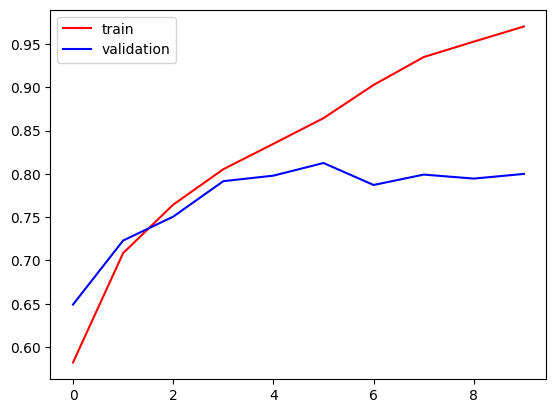

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


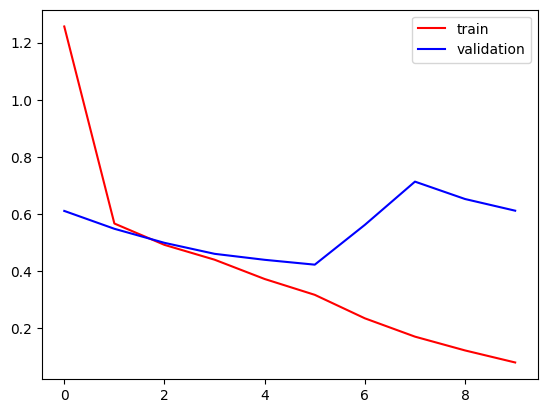

In [20]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

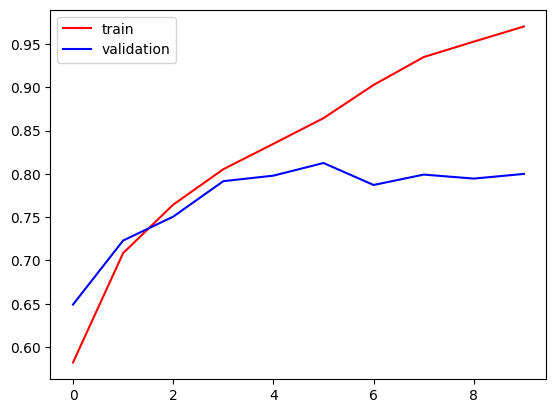

In [21]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [42]:
#reduce complexity
#add mor data
#reducing complexity

In [23]:
import cv2

In [44]:
test_image = cv2.imread('/content/download.jpg')

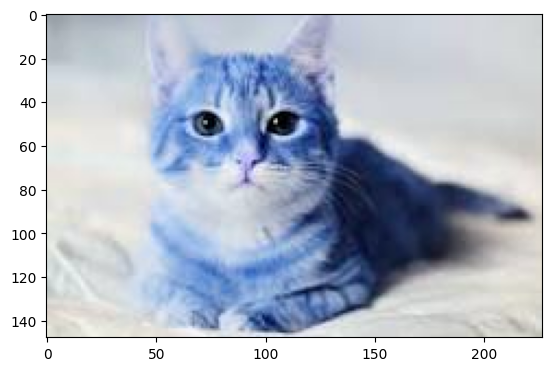

In [45]:
plt.imshow(test_image)

In [46]:
test_image.shape

(148, 227, 3)

In [47]:
test_image=cv2.resize(test_image,(256,256))

In [48]:
test_input = test_image.reshape(1,256,256,3)

In [49]:
model.predict(test_input)

1/1 [==============================] - 0s 25ms/step


array([[1.]], dtype=float32)